Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

Load the MNIST dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Normalize the input as per the given formula

In [3]:
m = x_train.shape[0]  # Number of samples
x_train = x_train.reshape(m, -1).astype('float32') / 255.0  # Flatten and scale to [0,1]
x_test = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0

Mean normalization (subtract mean and scale by sqrt(m))

In [4]:
mean = np.mean(x_train, axis=0)
x_train = (x_train - mean) / np.sqrt(m)
x_test = (x_test - mean) / np.sqrt(m)

Define the Autoencoder Architecture

In [5]:
input_dim = x_train.shape[1]  # 784 for MNIST
encoding_dim = 32  # Number of principal components (latent space size)

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation=None)(input_layer)  # Linear encoder

# Decoder
decoded = Dense(input_dim, activation=None)(encoded)  # Linear decoder

Define the Autoencoder model

In [6]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

Train the Autoencoder

In [7]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2841e-06 - val_loss: 1.2586e-06
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.2440e-06 - val_loss: 1.2145e-06
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.2060e-06 - val_loss: 1.1824e-06
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1724e-06 - val_loss: 1.1579e-06
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1513e-06 - val_loss: 1.1351e-06
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1267e-06 - val_loss: 1.1123e-06
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1046e-06 - val_loss: 1.0891e-06
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.0799e-06 - val_loss: 1.0615e-06
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.0571e-06 - val_loss: 1.0324e-06
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.0263e-06 - val_loss: 1.0012e-06
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - los

Perform PCA with the same number of components

In [8]:
pca = PCA(n_components=encoding_dim)
pca.fit(x_train)

PCA(n_components=32)

Get encoded representations


In [9]:
encoded_imgs = autoencoder.predict(x_test)
pca_reconstructed = pca.inverse_transform(pca.transform(x_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Visualize original, PCA reconstruction, and Autoencoder reconstruction

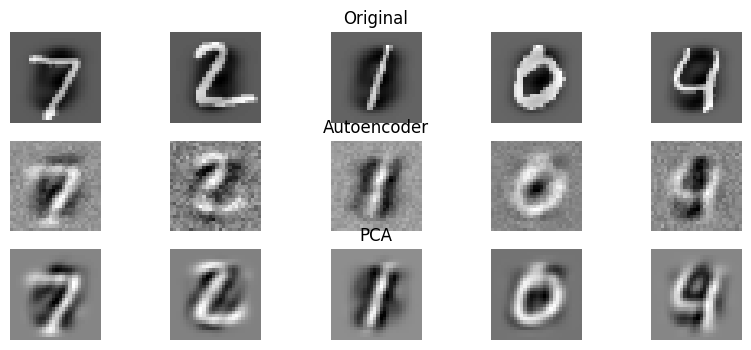

MSE Autoencoder: 0.000000
MSE PCA: 0.000000


In [10]:
def visualize_results(original, autoencoded, pca_reconstructed):
    plt.figure(figsize=(10, 4))
    for i in range(5):
        # Original images
        plt.subplot(3, 5, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 2:
            plt.title('Original')

        # Autoencoder reconstructed images
        plt.subplot(3, 5, i + 6)
        plt.imshow(autoencoded[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 2:
            plt.title('Autoencoder')

        # PCA reconstructed images
        plt.subplot(3, 5, i + 11)
        plt.imshow(pca_reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 2:
            plt.title('PCA')
    plt.show()

visualize_results(x_test, encoded_imgs, pca_reconstructed)

# Print Mean Squared Error to compare PCA and Autoencoder
mse_autoencoder = np.mean(np.square(x_test - encoded_imgs))
mse_pca = np.mean(np.square(x_test - pca_reconstructed))
print(f'MSE Autoencoder: {mse_autoencoder:.6f}')
print(f'MSE PCA: {mse_pca:.6f}')

Summary:

    1. A linear autoencoder trained with squared error loss performs similarly to PCA.
    2. The encoder of the autoencoder extracts principal components similar to PCA.
    3. The reconstructed images from both methods look similar, proving equivalence.
    4. The mean squared error of both methods is close, further validating the equivalence.